# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [4]:
df = pd.read_csv(r'C:\Users\cesar\Downloads\modulo7_projetofinal_base_supermercado.csv')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [5]:
#Análise exploratoria dos dados

display(df.describe())
display(f'MÉDIA da coluna "Preco_Normal": {df['Preco_Normal'].mean()}')
display(f'MEDIANA da coluna "Preco_Normal": {df['Preco_Normal'].median()}')

,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto
count,1107.000000,1107.000000,1107.000000,1107.000000
mean,2070.997290,522.269196,372.257453,68.109304
std,2961.257627,1339.559852,1239.475017,241.158310
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,0.000000,0.000000
75%,2849.000000,0.000000,0.000000,0.000000
max,19788.000000,14550.000000,18899.000000,4349.000000


'MÉDIA da coluna "Preco_Normal": 2070.9972899728996'

'MEDIANA da coluna "Preco_Normal": 1269.0'

In [6]:
#Seu código aqui para a média
print('MÉDIA')
media_categoria = df.groupby('Categoria')['Preco_Normal'].mean()
media_categoria

MÉDIA


Categoria
belleza-y-cuidado-personal    1783.556485
comidas-preparadas            3095.043478
congelados                    2108.042553
frutas                        1724.473684
instantaneos-y-sopas           765.491228
lacteos                       2385.219239
verduras                      1343.296875
Name: Preco_Normal, dtype: float64

In [7]:
#Seu código aqui para a mediana
print('MEDIANA')
mediana_categoria = df.groupby('Categoria')['Preco_Normal'].median()
mediana_categoria

MEDIANA


Categoria
belleza-y-cuidado-personal    1569.0
comidas-preparadas            3290.0
congelados                    1519.0
frutas                        1195.0
instantaneos-y-sopas           439.0
lacteos                        989.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64

In [8]:
df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median'])

,mean,median
Categoria,,
belleza-y-cuidado-personal,1783.556485,1569.0
comidas-preparadas,3095.043478,3290.0
congelados,2108.042553,1519.0
frutas,1724.473684,1195.0
instantaneos-y-sopas,765.491228,439.0
lacteos,2385.219239,989.0
verduras,1343.296875,1180.0


<h2>As categorias com média abaixo da mediana são: comidas-preparadas.
As categorias com média acima da mediana são: beleza-e-cuidado-pessoal, congelados, frutas, instantâneos-e-sopas, lácteos e verduras.</h2>

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [9]:
#Seu código aqui
df.groupby('Categoria')['Preco_Normal'].std()


Categoria
belleza-y-cuidado-personal    2210.041719
comidas-preparadas            2019.911428
congelados                    2111.539896
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
lacteos                       3925.816164
verduras                      1012.699625
Name: Preco_Normal, dtype: float64

In [10]:
df.groupby('Categoria')['Preco_Normal'].agg(['std', 'mean', 'median']).sort_values(by='std', ascending=False)


,std,mean,median
Categoria,,,
lacteos,3925.816164,2385.219239,989.0
belleza-y-cuidado-personal,2210.041719,1783.556485,1569.0
congelados,2111.539896,2108.042553,1519.0
comidas-preparadas,2019.911428,3095.043478,3290.0
frutas,1639.151114,1724.473684,1195.0
instantaneos-y-sopas,1170.232869,765.491228,439.0
verduras,1012.699625,1343.296875,1180.0


In [11]:
df_agrupado = df.groupby('Categoria')['Preco_Normal'].agg(['std', 'mean', 'median']).sort_values(by='std', ascending=False)
df_agrupado['std_diferenca_mean'] = df_agrupado['std'] - df_agrupado['mean']
df_agrupado.sort_values(by='std_diferenca_mean', ascending=False, key=abs)

,std,mean,median,std_diferenca_mean
Categoria,,,,
lacteos,3925.816164,2385.219239,989.0,1540.596925
comidas-preparadas,2019.911428,3095.043478,3290.0,-1075.132051
belleza-y-cuidado-personal,2210.041719,1783.556485,1569.0,426.485234
instantaneos-y-sopas,1170.232869,765.491228,439.0,404.741641
verduras,1012.699625,1343.296875,1180.0,-330.597250
frutas,1639.151114,1724.473684,1195.0,-85.322570
congelados,2111.539896,2108.042553,1519.0,3.497343


<h2>Há duas categorias com desvios padrão altos. A primeira é "lácteos", com um desvio padrão de 1540,5, e a segunda é "comidas-preparadas", com um desvio padrão de 1075,1.
Em ambos os casos, há indícios da presença de outliers (valores discrepantes) nas categorias.</h2>

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

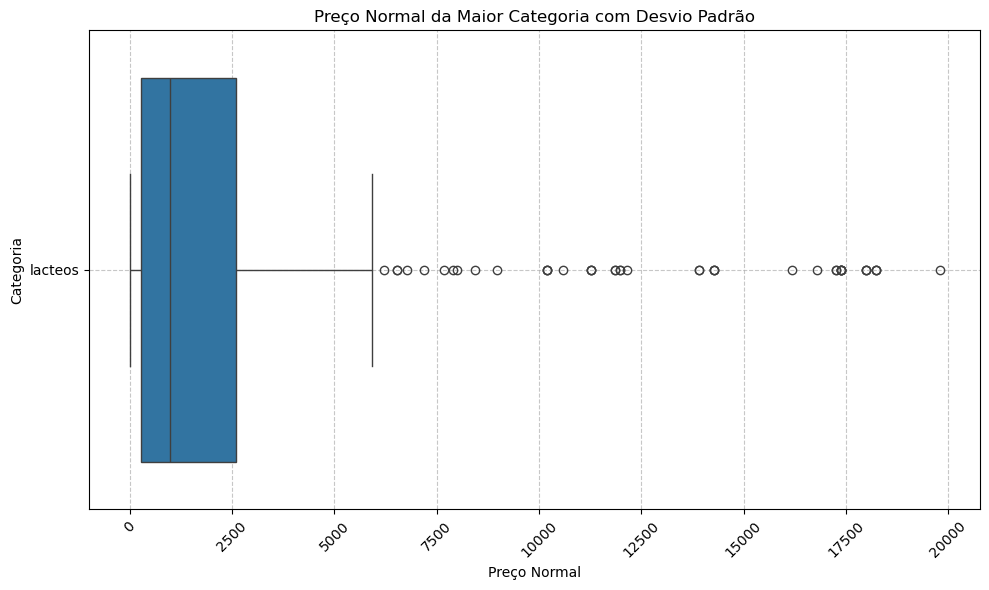

In [60]:
#Seu código aqui
# Certificar que os dados são numéricos
# df['Limite_Credito'] = df['Limite_Credito'].astype(int)
categoria = df.loc[df['Categoria'] == 'lacteos']
# Criar boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Preco_Normal', y='Categoria', data=categoria)

# Personalização
plt.title('Preço Normal da Maior Categoria com Desvio Padrão')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Preço Normal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>A grande maioria dos preços está acima da mediana, que é R$ 989,00, e há uma quantidade significativa de outliers.</h2>

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

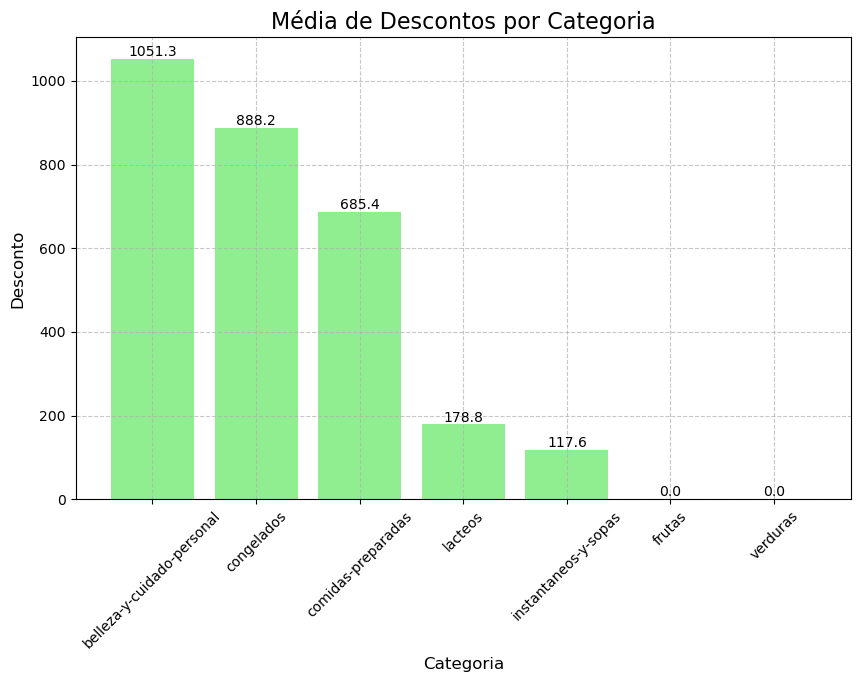

In [38]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
media_descontos_categoria = df.groupby('Categoria')['Preco_Desconto'].mean().sort_values(ascending=False)
plt.bar(range(len(media_descontos_categoria)), media_descontos_categoria, color='lightgreen')
#O primeiro argumento define a posição das barras ao longo do eixo x. Utilizamos range(len(salario_por_profissao)) para criar uma sequência numérica que representa as posições das barras,

# Adicionando rótulos de dados, o loop do for itera cada indicec (i) e valor de salário do nosso df, o enumerate retornará o indice e o valor de cada elemento:
for i, valor in enumerate(media_descontos_categoria):
    plt.text(i, valor,  f'{valor:.1f}', ha='center', va='bottom', fontsize=10)

# Restante do código para personalização do gráfico
plt.title('Média de Descontos por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Desconto', fontsize=12)
plt.xticks(range(len(media_descontos_categoria)), media_descontos_categoria.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

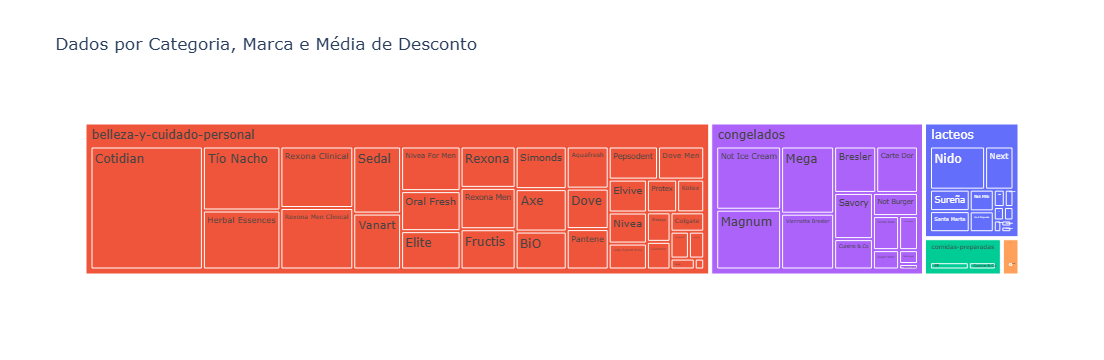

In [56]:
# Seu código aqui
categoria_marca = df.groupby(['Categoria', 'Marca'])['Preco_Desconto'].mean().reset_index()

fig = px.treemap(categoria_marca,
                 path=['Categoria', 'Marca'],
                 values='Preco_Desconto',
                 title='Dados por Categoria, Marca e Média de Desconto',
                 color='Categoria')
# Exibindo o gráfi
fig.show()